In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [2]:
%%time
train_data_chrome = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/train_set_featurized_response_BE.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

data_firefox = pd.read_parquet(
    "../data/processed/firefox/08_12_2022/merged_data_featurized_response_BE.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

data_brave = pd.read_parquet(
    "../data/processed/brave/08_12_2022/merged_data_featurized_response_BE.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

data_chrome = pd.read_parquet(
    "../data/processed/chrome/03_29_2023/merged_data_featurized_response_BE.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

CPU times: user 1.39 s, sys: 200 ms, total: 1.59 s
Wall time: 290 ms


In [9]:
train_data_chrome['dataset'] = 'chrome'
data_firefox['dataset'] = 'firefox'
data_brave['dataset'] = 'brave'
data_chrome['dataset'] = 'chrome_new'

In [10]:
combined_df = pd.concat([train_data_chrome, data_firefox, data_brave, data_chrome], ignore_index=True)

In [11]:
combined_df.reset_index(drop=True, inplace=True)

In [12]:
sampled_df, _ = train_test_split(combined_df, test_size=0.9, stratify=combined_df['tracker'], random_state=10)

In [13]:
sampled_df

,comb_col_non_tracker,comb_col_tracker,amp-access-control-allow-source-origin_binary,x-hubspot-correlation-id_binary,x-tt-trace-tag_binary,cdn-pullzone_binary,x-akamai-request-id_binary,requestid_binary,x-vcl-time-ms_binary,cross-origin-opener-policy_binary,...,x-served-by_binary,x-accel-expires_binary,request-context_binary,x-powered-by_binary,date_binary,content-security-policy_binary,x-request-id_binary,httpMessageId,tracker,dataset
1833774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,160,0,brave
1151233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,40,0,firefox
47512,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,209,0,chrome
861095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,197,1,firefox
2136796,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,55,0,chrome_new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,14,1,firefox
1709626,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,218,0,brave
2319030,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,77,1,chrome_new
2090249,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,241,0,chrome_new


In [14]:
X = sampled_df.iloc[:, 2:-3]

In [15]:
y = sampled_df['tracker']

In [17]:
%%time
tsne_combined = TSNE(n_components=2, random_state=10, perplexity=100, n_jobs=-1)
tsne_results_combined = tsne_combined.fit_transform(X)

CPU times: user 1h 39min 22s, sys: 22min 7s, total: 2h 1min 30s
Wall time: 17min 9s


In [18]:
tsne_df_combined = pd.DataFrame(tsne_results_combined, columns=['TSNE1', 'TSNE2'])
tsne_df_combined['tracker'] = sampled_df['tracker'].values
tsne_df_combined['dataset'] = sampled_df['dataset'].values

In [19]:
tsne_df_combined['dataset_tracker'] = tsne_df_combined['dataset'] + "_" + tsne_df_combined['tracker'].astype(str)

In [20]:
# Split the DataFrame into trackers and non-trackers
tsne_non_trackers = tsne_df_combined[tsne_df_combined['tracker'] == 0]
tsne_trackers = tsne_df_combined[tsne_df_combined['tracker'] == 1]

In [21]:
# Define custom color palettes for trackers and non-trackers
palette_non_trackers = {
    'chrome_0': '#E69F00',
    'chrome_new_0': '#56B4E9',
    'firefox_0': '#009E73',
    'brave_0': '#0072B2'
}

palette_trackers = {
    'chrome_1': '#E69F00',
    'chrome_new_1': '#56B4E9',
    'firefox_1': '#009E73',
    'brave_1': '#0072B2'
}

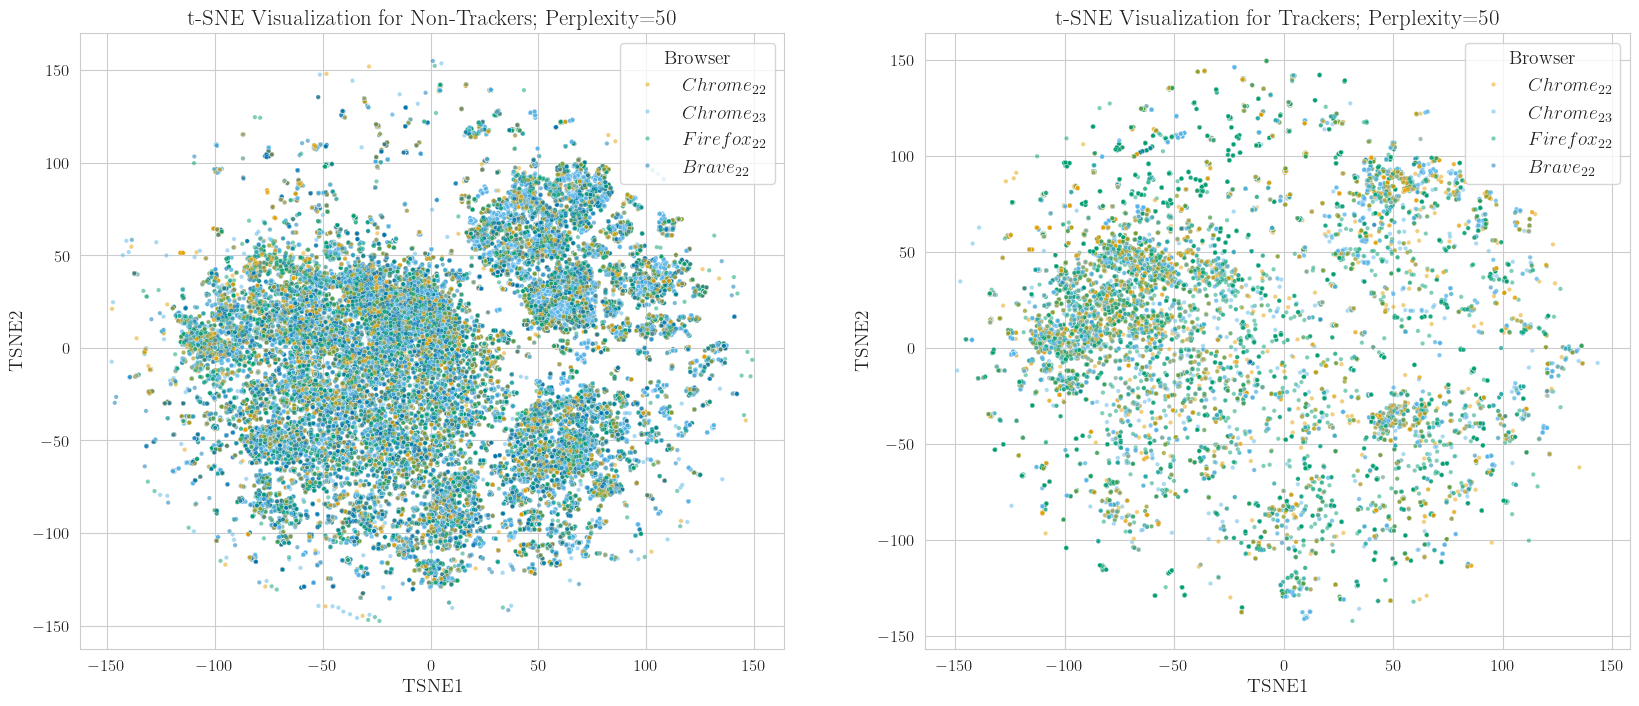

In [26]:
# Plot the t-SNE results
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
    # "pdf.fonttype": 3,
    "text.latex.preamble": r"\usepackage[T1]{fontenc}",
    })

hue_order_non_trackers = ['chrome_0', 'chrome_new_0', 'firefox_0', 'brave_0']
hue_order_trackers = ['chrome_1', 'chrome_new_1', 'firefox_1', 'brave_1']

# Non-trackers plot
sns.scatterplot(x='TSNE1', y='TSNE2', hue='dataset_tracker', data=tsne_non_trackers, palette=palette_non_trackers, hue_order=hue_order_non_trackers, alpha=0.5, ax=ax[0], s=10, c='k')
ax[0].set_title('t-SNE Visualization for Non-Trackers; Perplexity=50', fontsize=16)
ax[0].set_xlabel('TSNE1', fontsize=14)
ax[0].set_ylabel('TSNE2', fontsize=14)
ax[0].legend(title='Browser')
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].grid(True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
    # "pdf.fonttype": 3,
    "text.latex.preamble": r"\usepackage[T1]{fontenc}",
    })
# Trackers plot
sns.scatterplot(x='TSNE1', y='TSNE2', hue='dataset_tracker', data=tsne_trackers, palette=palette_trackers, hue_order=hue_order_trackers, alpha=0.5, ax=ax[1], s=10, c='k')
ax[1].set_title('t-SNE Visualization for Trackers; Perplexity=50', fontsize=16)
ax[1].set_xlabel('TSNE1', fontsize=14)
ax[1].set_ylabel('TSNE2', fontsize=14)
ax[1].legend(title='Browser')
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].grid(True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
    # "pdf.fonttype": 3,
    "text.latex.preamble": r"\usepackage[T1]{fontenc}",
    })
# Modify the legend labels to show only the browser name
handles, labels = ax[0].get_legend_handles_labels()
new_labels = ['$Chrome_{22}$', '$Chrome_{23}$', '$Firefox_{22}$', '$Brave_{22}$']
ax[0].legend(handles=handles, labels=new_labels, title='Browser', loc='upper right')

handles, labels = ax[1].get_legend_handles_labels()
new_labels = ['$Chrome_{22}$', '$Chrome_{23}$', '$Firefox_{22}$', '$Brave_{22}$']
ax[1].legend(handles=handles, labels=new_labels, title='Browser', loc='upper right')
plt.savefig('tsne_clustering.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Amount of custom headers

In [2]:
old_chrome = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/merged_data_response.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

In [3]:
count_custom_headers = len([col for col in old_chrome.columns if col.lower().startswith('x-')])

In [4]:
print(f'Number of custom headers in chrome: {count_custom_headers}')

Number of custom headers in chrome: 5612


In [5]:
standard_headers = ['age', 'accept-patch', 'accept-ranges','allow','alt-svc','cache-control','connection','content-disposition',
                    'content-encoding','content-language','content-length','content-location','content-range','content-type',
                    'date','delta-base','etag','expires','im','last-modified','link','location','pragma','proxy-authenticate',
                    'public-key-pins','retry-after','server','set-cookie','strict-transport-security','strict-transport-security',
                    'trailer','transfer-encoding','tk','upgrade','vary','via','warning','www-authenticate','access-control-allow-origin',
                    'access-control-allow-credentials','access-control-expose-headers','access-control-max-age','access-control-allow-methods',
                    'access-control-allow-headers']

In [6]:
count_custom_headers = len(
    [col for col in old_chrome.columns if col.lower() not in standard_headers])
print(f'Number of custom headers in chrome: {count_custom_headers}')

Number of custom headers in chrome: 8058
